#                                       MAJOR PROJECT IN MACHINE LEARNING

 ### Problem Statement:   we will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

                                                MAJOR PROJECT
                                              TASK TO BE PERFORMED

    1.Clean Data(Null value removal, Outlier identification)

    2.Null Values(Dropping the rows /Columns and what is the reason or how you are imputing the null).

    3.EDA(Minor Project to understand the relations, repeat the same here)

    4.Handle Categorical Variable(Using Label Encoding/One hot encoding)

    5.Try to do data scaling for Kilometers driven

    6.Do the train test  split

    7.Apply different ML regression Algorithms

    8.Calculate the error metrics.

## FEATURES:

* Name: The brand and model of the car. 
* Location: The location in which the car is being sold or is available for purchase. 
* Year: The year or edition of the model.
* Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type: The type of fuel used by the car.
* Transmission: The type of transmission used by the car. 
* Owner_Type: Whether the ownership is Firsthand, Second hand or other. 
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in cc.
* Power: The maximum power of the engine in bhp. 
* Seats: The number of seats in the car. 
* Price: The price of the used car in INR Lakhs.

# Clean Data(Null value removal,Outlier identification)

In [1]:
#Reading the dataset of train

import numpy as np
import pandas as pd
data_train = pd.read_excel(r"C:\Users\sandeep kumar\Documents\Verzeo\Data_Train.xlsx")

In [2]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [3]:
data_train.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65
6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,2.50


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [5]:
data_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [6]:
data_train.select_dtypes('object').nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          442
Engine           146
Power            372
dtype: int64

In [7]:
# count the number of nan values in each column

data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [8]:
# replace '0' values with 'nan'

from numpy import nan
data_train.replace(0, nan)
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [9]:
print('Shape of the raw data')
print(data_train.shape)

# drop rows with missing values
data_train.dropna(inplace=True)
print('Shape of the data after missing rows removed')
print(data_train.shape)

Shape of the raw data
(6019, 12)
Shape of the data after missing rows removed
(5975, 12)


In [10]:
data_train.select_dtypes('object').nunique()


Name            1855
Location          11
Fuel_Type          4
Transmission       2
Owner_Type         4
Mileage          442
Engine           145
Power            371
dtype: int64

In [11]:
Q1=data_train.quantile(0.25)
Q3=data_train.quantile(0.75)
IQR=Q3-Q1
print(IQR)

Year                     4.00
Kilometers_Driven    39092.00
Seats                    0.00
Price                    6.45
dtype: float64


In [12]:
print((data_train<(Q1-1.5*IQR))|(data_train>(Q3+1.5*IQR)))

      Engine  Fuel_Type  Kilometers_Driven  Location  Mileage   Name  \
0      False      False              False     False    False  False   
1      False      False              False     False    False  False   
2      False      False              False     False    False  False   
3      False      False              False     False    False  False   
4      False      False              False     False    False  False   
...      ...        ...                ...       ...      ...    ...   
6014   False      False              False     False    False  False   
6015   False      False              False     False    False  False   
6016   False      False              False     False    False  False   
6017   False      False              False     False    False  False   
6018   False      False              False     False    False  False   

      Owner_Type  Power  Price  Seats  Transmission   Year  
0          False  False  False  False         False  False  
1          Fa

#  Dropping the rows /Columns  

In [13]:
# Show datasets

data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [14]:
data_train.drop(['Year'],axis=1)  # for permanently delete column use inplace=true  ex.=(['Year'],axis=1,inplace=true)

,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [15]:
data_train.drop(['Name'],axis=1)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...
6014,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


# EDA(Minor Project to understand the relations with Data Visualization)


In [16]:
import numpy as np
import pandas as pd 
data_train = pd.read_excel(r"C:\Users\sandeep kumar\Documents\Verzeo\Data_Train.xlsx")

data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [17]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [18]:
# Various categories present in the different categorical column


print("\n Categories in 'Location' variable:   \n  ",end=" " )
print(data_train['Location'].unique())

print("\n Categories in 'Year' variable: \n ",end=" ")
print(data_train['Year'].unique())

print("\n Categories in'Fuel_Type' variable:\n",end=" " )
print(data_train['Fuel_Type'].unique())

print(" \n Categories in 'Owner_Type' variable:  \n   ",end=" " )
print(data_train['Owner_Type'].unique())

print("\n Categories in 'Transmission' variable:  \n   ",end=" " )
print(data_train['Transmission'].unique())

print("\n Categories in 'Seats' variable:   \n  ",end=" " )
print(data_train['Seats'].unique())


 Categories in 'Location' variable:   
   ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']

 Categories in 'Year' variable: 
  [2010 2015 2011 2012 2013 2016 2018 2014 2017 2007 2009 2008 2019 2006
 2005 2004 2002 2000 2003 1999 2001 1998]

 Categories in'Fuel_Type' variable:
 ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
 
 Categories in 'Owner_Type' variable:  
    ['First' 'Second' 'Fourth & Above' 'Third']

 Categories in 'Transmission' variable:  
    ['Manual' 'Automatic']

 Categories in 'Seats' variable:   
   [ 5.  7.  8.  4.  6.  2. nan 10.  9.  0.]


In [19]:
#Describing the datasets

data_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [20]:
#data.isnull()

data_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [21]:
# number of unique item present in categorical columns

data_train.select_dtypes('object').nunique()

Name            1876
Location          11
Fuel_Type          5
Transmission       2
Owner_Type         4
Mileage          442
Engine           146
Power            372
dtype: int64

In [22]:
data_train['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

Text(0.5, 1.0, 'Location ')

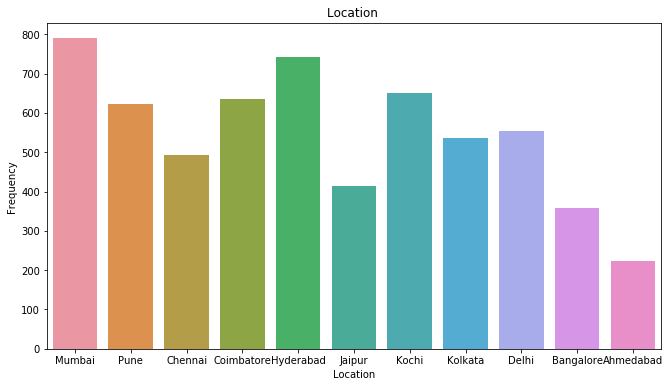

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
plt.rcParams['figure.figsize'] = (11,6)
sns.countplot(x="Location",  data = data_train)
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Location ')

In [24]:
data_train['Year'].unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998],
      dtype=int64)

Text(0.5, 1.0, 'Year ')

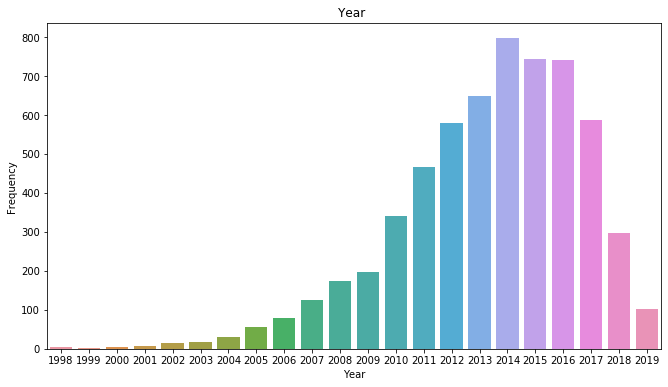

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
plt.rcParams['figure.figsize'] = (11,6)
sns.countplot(x="Year",  data = data_train)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year ')

In [26]:
data_train['Kilometers_Driven'].unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365], dtype=int64)

Text(0.5, 1.0, 'Fuel_Type')

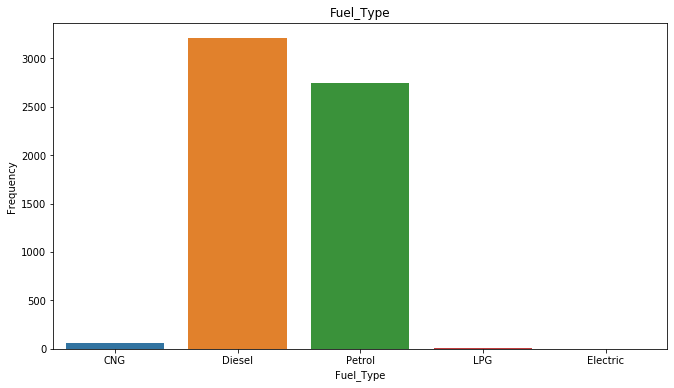

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks
plt.rcParams['figure.figsize'] = (11,6)
sns.countplot(x="Fuel_Type",  data = data_train)
plt.xlabel('Fuel_Type')
plt.ylabel('Frequency')
plt.title('Fuel_Type')

Text(0.5, 1.0, 'Number of Seats')

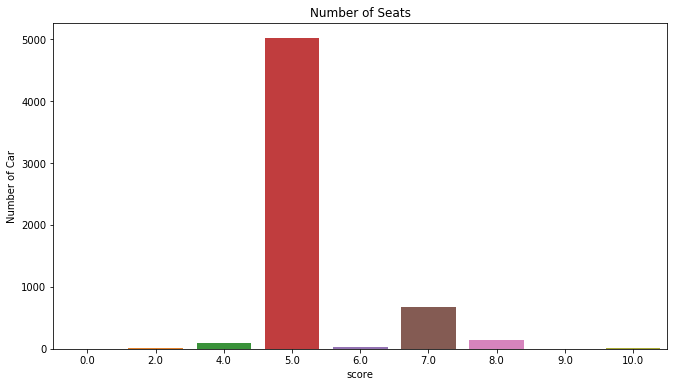

In [28]:
from matplotlib.pyplot import xticks
sns.countplot(x="Seats",data = data_train)
plt.xlabel('score')
plt.ylabel('Number of Car')
plt.title('Number of Seats')

In [29]:
data_train.groupby(['Fuel_Type', 'Transmission'])['Price'].median()

Fuel_Type  Transmission
CNG        Manual           3.250
Diesel     Automatic       21.400
           Manual           5.750
Electric   Automatic       12.875
LPG        Manual           2.600
Petrol     Automatic        6.940
           Manual           3.595
Name: Price, dtype: float64

In [30]:
data_train.groupby(['Location', 'Transmission'])['Price'].median()

Location    Transmission
Ahmedabad   Automatic       15.750
            Manual           4.750
Bangalore   Automatic       21.870
            Manual           5.250
Chennai     Automatic       12.625
            Manual           4.000
Coimbatore  Automatic       25.020
            Manual           6.580
Delhi       Automatic       15.650
            Manual           4.350
Hyderabad   Automatic       18.125
            Manual           4.900
Jaipur      Automatic       12.875
            Manual           3.910
Kochi       Automatic       18.360
            Manual           5.695
Kolkata     Automatic       11.435
            Manual           3.400
Mumbai      Automatic       11.600
            Manual           4.750
Pune        Automatic       11.500
            Manual           3.500
Name: Price, dtype: float64

In [31]:
data_train.groupby(['Mileage', 'Engine'])['Price'].median()

Mileage    Engine 
0.0 kmpl   1086 CC     1.370
           1242 CC     0.550
           1498 CC     3.600
           1590 CC     1.300
           1950 CC    37.330
                       ...  
9.74 kmpl  1984 CC    14.000
9.8 kmpl   1995 CC     3.950
           2354 CC     3.500
9.9 kmpl   1984 CC    28.425
           3498 CC    32.000
Name: Price, Length: 786, dtype: float64

In [32]:
data_train.groupby(['Mileage', 'Power'])['Price'].median()

Mileage    Power     
0.0 kmpl   115 bhp       16.625
           165 bhp       40.500
           181.43 bhp    38.990
           194 bhp       35.670
           241.4 bhp     28.000
                          ...  
9.74 kmpl  208 bhp       14.000
9.8 kmpl   163.5 bhp      3.950
           180 bhp        3.500
9.9 kmpl   207.8 bhp     28.425
           271.72 bhp    32.000
Name: Price, Length: 918, dtype: float64

In [33]:
data_train.groupby(['Location', 'Kilometers_Driven'])['Price'].median()

Location   Kilometers_Driven
Ahmedabad  1000                  6.85
           2000                  7.75
           4000                 35.00
           6006                  8.25
           11000                 3.90
                                ...  
Pune       215750                3.50
           220000                6.00
           225000                2.60
           255000                6.50
           282000                3.30
Name: Price, Length: 3959, dtype: float64

In [34]:
data_train.groupby(['Engine', 'Seats'])['Price'].median()

Engine   Seats
1047 CC  5.0      6.07
1061 CC  5.0      1.51
1086 CC  5.0      2.05
1120 CC  5.0      4.50
1150 CC  5.0      1.15
                  ... 
993 CC   5.0      0.86
995 CC   5.0      1.50
998 CC   4.0      3.55
         5.0      3.19
999 CC   5.0      4.41
Name: Price, Length: 216, dtype: float64

In [35]:
data_train.groupby(['Power', 'Seats'])['Price'].median()

Power      Seats
100 bhp    5.0       2.255
           7.0       7.825
           8.0      10.200
100.6 bhp  7.0      11.990
           8.0      10.000
                     ...  
null bhp   5.0       2.100
           6.0       4.345
           7.0       5.375
           8.0       2.200
           10.0      3.500
Name: Price, Length: 460, dtype: float64

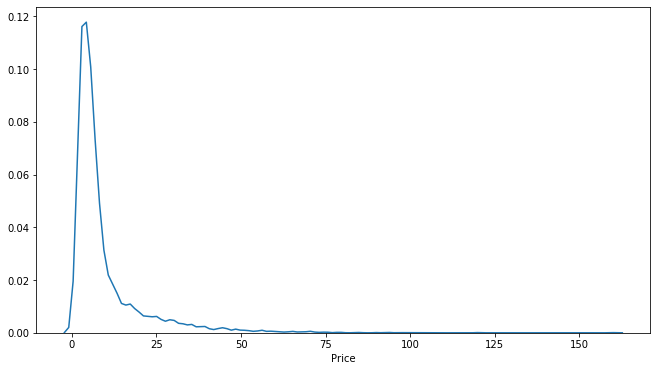

In [36]:
sns.distplot(data_train['Price'], hist = False)

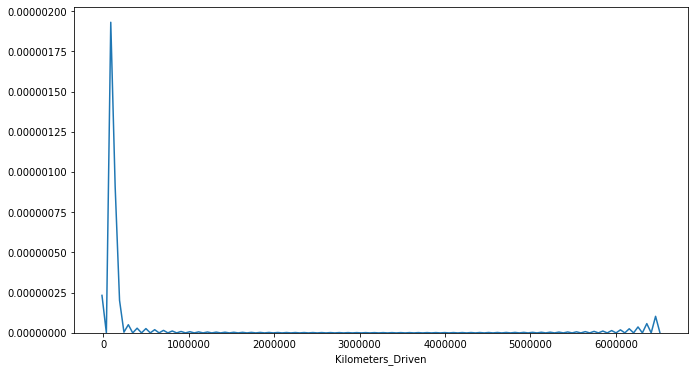

In [37]:
sns.distplot(data_train['Kilometers_Driven'], hist = False)

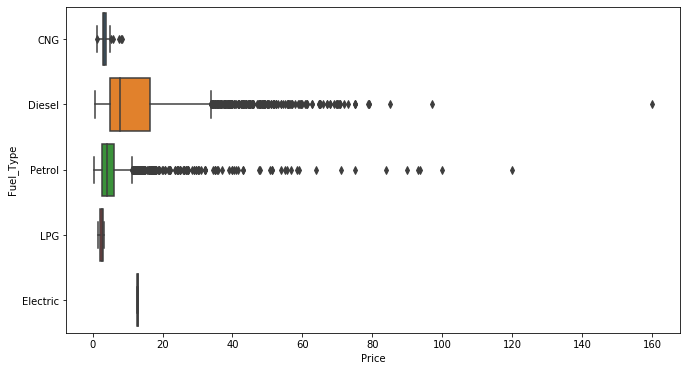

In [38]:
sns.boxplot(y = 'Fuel_Type', x = 'Price', data = data_train)

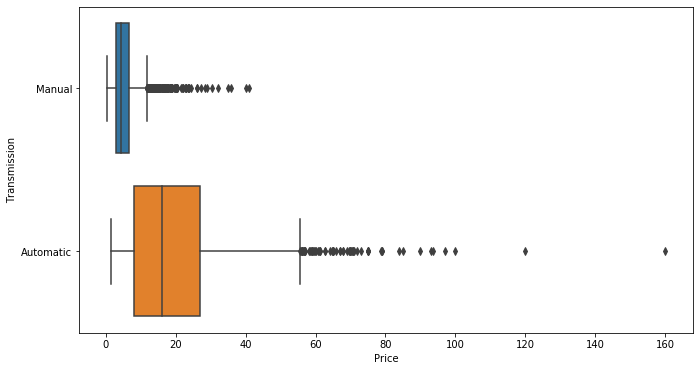

In [39]:
sns.boxplot(y = 'Transmission', x = 'Price', data = data_train)

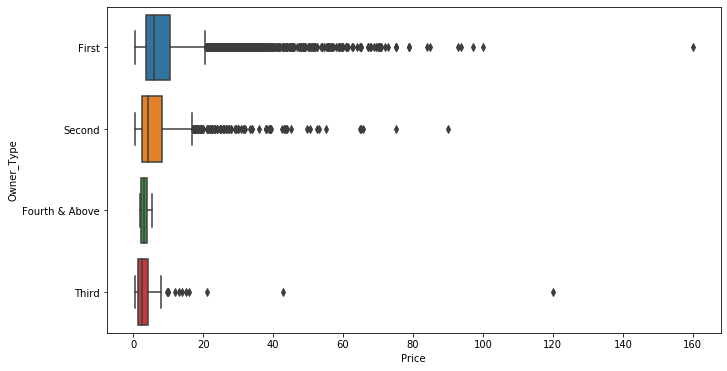

In [40]:
sns.boxplot(y = 'Owner_Type', x = 'Price', data = data_train)

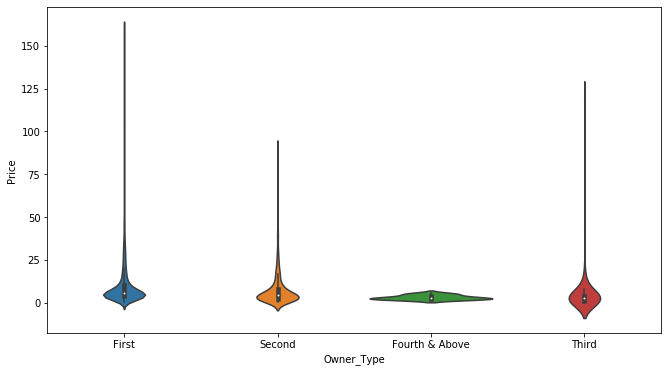

In [41]:
sns.violinplot(x="Owner_Type",y="Price",data=data_train,size=10)
plt.show()

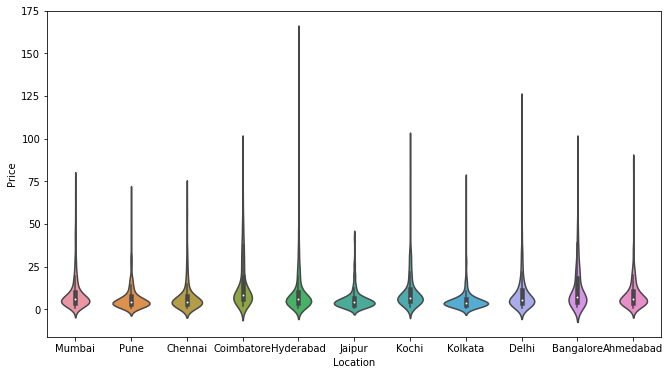

In [42]:
sns.violinplot(x="Location",y="Price",data=data_train,size=10)
plt.show()

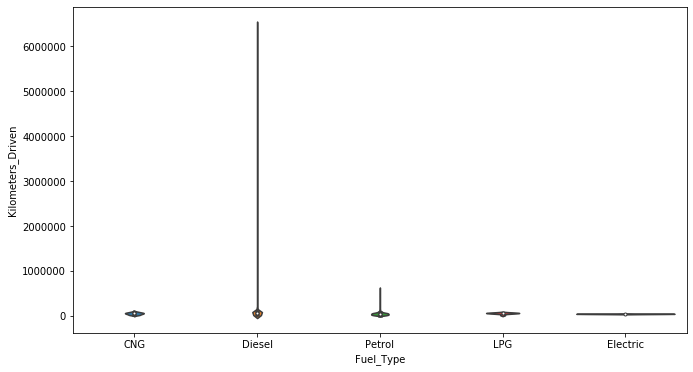

In [43]:
sns.violinplot(x="Fuel_Type",y="Kilometers_Driven",data=data_train,size=10)
plt.show()

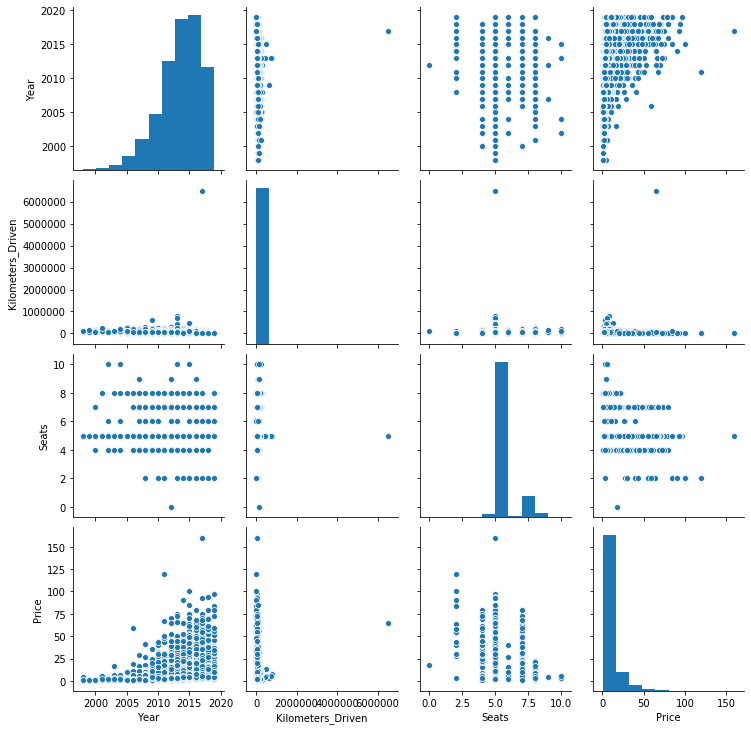

In [44]:
sns.pairplot(data_train)

Text(0.5, 1, 'Price distribution over the year w.r.t to Fuel_Type')

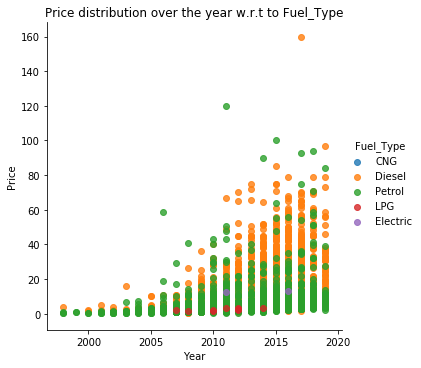

In [45]:
sns.lmplot('Year','Price', data_train, fit_reg=False, hue='Fuel_Type')
plt.title("Price distribution over the year w.r.t to Fuel_Type")

Text(0.5, 1.0, 'Top 10 car brands ')

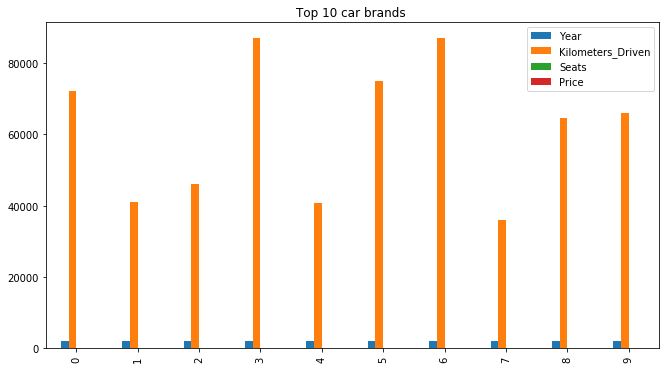

In [46]:
data_train.head(10).plot.bar()
plt.title("Top 10 car brands ")

#   Handle Categorical Variable(Using Label Encoding)

Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form and it assigns a unique number(starting from 0) to each class of data. 

In [47]:
data_train['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [48]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Location'. 
data_train['Location']= label_encoder.fit_transform(data_train['Location']) 
  
data_train['Location'].unique() 

array([ 9, 10,  2,  3,  5,  6,  7,  8,  4,  1,  0])

In [49]:
data_train['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [50]:
# Encode labels in column 'Fuel_Type'. 

data_train['Fuel_Type']= label_encoder.fit_transform(data_train['Fuel_Type']) 
  
data_train['Fuel_Type'].unique() 

array([0, 1, 4, 3, 2])

In [51]:
data_train['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [52]:
# Encode labels in column 'Name'.

data_train['Name']= label_encoder.fit_transform(data_train['Name']) 
  
data_train['Name'].unique() 

array([1200,  512,  486, ..., 1830, 1562,  932])

In [53]:
data_train['Transmission'].unique()


array(['Manual', 'Automatic'], dtype=object)

In [54]:
# Encode labels in column 'Transmission'.

data_train['Transmission']= label_encoder.fit_transform(data_train['Transmission']) 
  
data_train['Transmission'].unique() 

array([1, 0])

In [55]:
data_train['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [56]:
# Encode labels in column 'Owner_Type'.

data_train['Owner_Type']= label_encoder.fit_transform(data_train['Owner_Type']) 
  
data_train['Owner_Type'].unique() 

array([0, 2, 1, 3])

In [57]:
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1200,9,2010,72000,0,1,0,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,512,10,2015,41000,1,1,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,486,2,2011,46000,4,1,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,1059,2,2012,87000,1,1,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,23,3,2013,40670,1,0,2,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


#   Data scaling for Kilometers driven

In [58]:
#Reading the dataset of Train

import numpy as np
import pandas as pd
data_train = pd.read_excel(r"C:\Users\sandeep kumar\Documents\Verzeo\data_train.xlsx")
data_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


.

Data Normalization

In [59]:
import matplotlib.pyplot as plt 
# Sklearn library 
from sklearn import preprocessing  

# here Features - Kilometers_Driven and Price columns are taken using slicing to handle values with varying magnitude 


x=data_train[['Kilometers_Driven','Price']]
print ("\n Original data values : \n", x) 


from sklearn import preprocessing 

#  MIN MAX SCALER 

min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 

#  Scaled feature  
    
x_after_min_max_scaler = min_max_scaler.fit_transform(x) 

print ("\n After min max Scaling : \n\n", x_after_min_max_scaler) 


 Original data values : 
       Kilometers_Driven  Price
0                 72000   1.75
1                 41000  12.50
2                 46000   4.50
3                 87000   6.00
4                 40670  17.74
...                 ...    ...
6014              27365   4.75
6015             100000   4.00
6016              55000   2.90
6017              46000   2.65
6018              47000   2.50

[6019 rows x 2 columns]

 After min max Scaling : 

 [[0.01105091 0.00821008]
 [0.00628155 0.07558285]
 [0.0070508  0.02544497]
 ...
 [0.00843545 0.0154174 ]
 [0.0070508  0.01385059]
 [0.00720465 0.0129105 ]]


In [60]:
#Scaling Kilometers_Driven column using minmax scaler

from sklearn.preprocessing import MinMaxScaler

kilometers = data_train['Kilometers_Driven']
kilometers_matrix = kilometers.values.reshape(-1,1)

scaler = MinMaxScaler()
kilometers_scaled = scaler.fit_transform(kilometers_matrix)

In [61]:
data_train['Kilometers_Driven'] = kilometers_scaled

In [62]:

data_train.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,0.011051,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,0.006282,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,0.007051,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,0.013359,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,0.006231,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,0.011512,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,2.35
6,Nissan Micra Diesel XV,Jaipur,2013,0.013359,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,3.50
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,0.005512,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,17.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,0.009886,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,5.20
9,Tata Indica Vista Quadrajet LS,Chennai,2012,0.010117,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,1.95


.

Data Standardisation 


In [63]:
x=data_train[['Kilometers_Driven','Price']]
print ("\n Original data values : \n", x) 

#  Standardisation 

Standardisation = preprocessing.StandardScaler() 

# Scaled feature 

x_after_Standardisation = Standardisation.fit_transform(x) 

print ("\n After Standardisation : \n\n", x_after_Standardisation) 



 Original data values : 
       Kilometers_Driven  Price
0              0.011051   1.75
1              0.006282  12.50
2              0.007051   4.50
3              0.013359   6.00
4              0.006231  17.74
...                 ...    ...
6014           0.004184   4.75
6015           0.015359   4.00
6016           0.008435   2.90
6017           0.007051   2.65
6018           0.007205   2.50

[6019 rows x 2 columns]

 After Standardisation : 

 [[ 0.14531489 -0.69093384]
 [-0.19436922  0.27000402]
 [-0.13958146 -0.44511253]
 ...
 [-0.0409635  -0.58813584]
 [-0.13958146 -0.61048323]
 [-0.12862391 -0.62389166]]


#  Train Test  Split

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [65]:
y=data_train.Name
x=data_train.drop('Name',axis=1)

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2928,Chennai,2014,0.006589,Diesel,Automatic,Second,16.36 kmpl,2179 CC,187.7 bhp,5.0,26.50
5424,Hyderabad,2013,0.009541,Diesel,Manual,First,17.2 kmpl,1396 CC,53.5 bhp,5.0,2.95
5002,Kochi,2017,0.005624,Diesel,Automatic,First,18.56 kmpl,1995 CC,190 bhp,5.0,32.57
4626,Hyderabad,2015,0.010282,Diesel,Manual,First,27.3 kmpl,1498 CC,98.6 bhp,5.0,6.90
2762,Bangalore,2012,0.007512,Diesel,Automatic,Second,14.84 kmpl,2143 CC,167.62 bhp,5.0,19.25


In [67]:
x_train.shape

(4815, 11)

In [68]:
x_test.shape

(1204, 11)

In [69]:
x_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
1598,Jaipur,2017,0.000128,Diesel,Manual,First,13.49 kmpl,2179 CC,138.03 bhp,5.0,7.50
2069,Jaipur,2014,0.010846,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,9.00
383,Kochi,2014,0.006340,Petrol,Automatic,Second,14.8 kmpl,1595 CC,120.7 bhp,5.0,11.77
5094,Kochi,2017,0.004003,Diesel,Automatic,First,17.9 kmpl,2143 CC,168 bhp,5.0,40.47
1887,Mumbai,2012,0.004435,Petrol,Manual,First,18.5 kmpl,1197 CC,85.80 bhp,5.0,3.25


# LINEAR REGRESSION

In [106]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [107]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [108]:
predictions=lm.predict(x_test)

In [110]:
from sklearn import metrics
metrics.r2_score(y_test,predictions)

0.9268261088570996

In [111]:
import xgboost as xgb
my_model = xgb.XGBRegressor(n_estimators=1000,learning_rate = 0.1)

In [113]:
my_model.fit(x_train, y_train) 
             

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [115]:
predictions1 = my_model.predict(x_test)

In [117]:
from sklearn import metrics
metrics.r2_score(y_test,predictions1)

0.998058445656913

# LOGISTIC REGRESSION

In [120]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
Y_pred = classifier.predict(x_test)

In [122]:
#Let’s test the performance of our model – Confusion Matrix

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[ 9  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [123]:
#Performance measure – Accuracy
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  1.0
